## chapter 08 : 판다스의 알짜기능

##### 다음 명령은 한글 사용을 위한 명령임

### 8.1 사례 분석 : 울릉도의 날씨를 알아보자

In [108]:
import pandas as pd   # 이하 이 코드는 표시하지 않음

path = 'https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/'
wdf = pd.read_csv(path+'weather.csv', encoding='UTF-8')
print(wdf.head())

           일시  평균 기온  최대 풍속  평균 풍속
0  2010-08-01   28.7    8.3    3.4
1  2010-08-02   25.2    8.7    3.8
2  2010-08-03   22.1    6.3    2.9
3  2010-08-04   25.3    6.6    4.2
4  2010-08-05   27.2    9.1    5.6


In [109]:
# '일시' 열을 인덱스 열로 사용하자
wdf = pd.read_csv(path+'weather.csv', encoding='UTF-8').set_index('일시')

print(wdf.head(3))

            평균 기온  최대 풍속  평균 풍속
일시                             
2010-08-01   28.7    8.3    3.4
2010-08-02   25.2    8.7    3.8
2010-08-03   22.1    6.3    2.9


In [110]:
print(wdf.tail(3))

            평균 기온  최대 풍속  평균 풍속
일시                             
2020-07-29   21.6    3.2    1.0
2020-07-30   22.9    9.7    2.4
2020-07-31   25.7    4.8    2.5


In [111]:
print(wdf.describe())

             평균 기온        최대 풍속        평균 풍속
count  3653.000000  3649.000000  3647.000000
mean     12.942102     7.911099     3.936441
std       8.538507     3.029862     1.888473
min      -9.000000     2.000000     0.200000
25%       5.400000     5.700000     2.500000
50%      13.800000     7.600000     3.600000
75%      20.100000     9.700000     5.000000
max      31.300000    26.000000    14.900000


### 8.2 울릉도 날씨의 특징을 살펴보자

In [112]:
print('평균 분석 -----------------------------')
print(wdf.mean(numeric_only=True))
print('표준편차  분석 -----------------------------')
print(wdf.std(numeric_only=True))

평균 분석 -----------------------------
평균 기온    12.942102
최대 풍속     7.911099
평균 풍속     3.936441
dtype: float64
표준편차  분석 -----------------------------
평균 기온    8.538507
최대 풍속    3.029862
평균 풍속    1.888473
dtype: float64


#### 잠깐 - 판다스의 표준 편차와 넘파이의 표준 편차의 차이

In [ ]:
import numpy as np

pandas_std = wdf['평균 기온'].std()
numpy_std = np.std( wdf['평균 기온'] )
print(pandas_std, numpy_std)

#### 데이터 집계 분석도 쉽게 해 보자

In [ ]:
wdf.count()   # 각 열의 데이터 수를 알려준다

In [ ]:
wdf['최대 풍속'].count()   # '최대 풍속' 열의 데이터 수를 알려준다

In [ ]:
wdf[['최대 풍속','평균 풍속']].count()  # '최대풍속', '평균풍속' 열의 데이터 수

In [ ]:
wdf.count()[['최대 풍속', '평균 풍속']]

#### 도전문제 8.1 : 울릉도의 일일 평균 기온, 평균 풍속, 최대 풍속의 최대값 출력하기(난이도 : 중)
##### weather.csv 파일을 사용하여 이 데이터에 있는 울릉도의 일일 평균 기온의 최대값, 평균 풍속의 최대값, 최대 풍속의 최대값과 최소값을 아래와 같이 각각 출력하여라.

In [ ]:
print('울릉도의 일일 평균 기온의 최대값 :',wdf['평균 기온'].max())
print('울릉도의 일일 평균 풍속의 최대값 :',wdf['평균 풍속'].max())
print('울릉도의 일일 최대 풍속의 최대값 :',wdf['최대 풍속'].max())

print('울릉도의 일일 평균 기온의 최소값 :',wdf['평균 기온'].min())
print('울릉도의 일일 평균 풍속의 최소값 :',wdf['평균 풍속'].min())
print('울릉도의 일일 최대 풍속의 최소값 :',wdf['최대 풍속'].min())

### 8.3 연도와 월, 일을 다루는 DatetimeIndex

In [113]:
import pandas as pd

# DatetimeIndex를 이용하여 연도를 추출
print(pd.DatetimeIndex(['2010-08-01', '2011-09-21']).year)

Index([2010, 2011], dtype='int32')


In [114]:
# DatetimeIndex를 이용하여 월을 추출
print(pd.DatetimeIndex(['2010-08-01', '2011-09-21']).month)

Index([8, 9], dtype='int32')


In [115]:
# DatetimeIndex를 이용하여 일을 추출
print(pd.DatetimeIndex(['2010-08-01', '2011-09-21']).day)

Index([1, 21], dtype='int32')


In [116]:
wdf

,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6
...,...,...,...
2020-07-27,22.1,4.2,1.7
2020-07-28,21.9,4.5,1.6
2020-07-29,21.6,3.2,1.0


In [117]:
wdf.index

Index(['2010-08-01', '2010-08-02', '2010-08-03', '2010-08-04', '2010-08-05',
       '2010-08-06', '2010-08-07', '2010-08-08', '2010-08-09', '2010-08-10',
       ...
       '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26',
       '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31'],
      dtype='object', name='일시', length=3653)

In [118]:
 pd.DatetimeIndex(wdf.index).month

Index([8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       ...
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
      dtype='int32', name='일시', length=3653)

In [119]:
# 새로운 'month' 열을 만든다
wdf['month'] = pd.DatetimeIndex(wdf.index).month
wdf.head(100)

,평균 기온,최대 풍속,평균 풍속,month
일시,,,,
2010-08-01,28.7,8.3,3.4,8
2010-08-02,25.2,8.7,3.8,8
2010-08-03,22.1,6.3,2.9,8
2010-08-04,25.3,6.6,4.2,8
2010-08-05,27.2,9.1,5.6,8
...,...,...,...,...
2010-11-04,12.6,6.7,2.9,11
2010-11-05,13.5,6.6,3.2,11
2010-11-06,14.6,5.4,3.3,11


In [120]:
wdf['day'] = pd.DatetimeIndex(wdf.index).day
wdf.head(8)

,평균 기온,최대 풍속,평균 풍속,month,day
일시,,,,,
2010-08-01,28.7,8.3,3.4,8,1
2010-08-02,25.2,8.7,3.8,8,2
2010-08-03,22.1,6.3,2.9,8,3
2010-08-04,25.3,6.6,4.2,8,4
2010-08-05,27.2,9.1,5.6,8,5
2010-08-06,26.8,9.8,8.0,8,6
2010-08-07,27.5,9.1,5.0,8,7
2010-08-08,26.6,5.9,4.0,8,8


#### 도전문제 8.2 : DatetimeIndex 기능을 사용하여 year 열을 만들자(난이도 : 중)

In [121]:
wdf['year'] = pd.DatetimeIndex(wdf.index).year
wdf.head(4)

,평균 기온,최대 풍속,평균 풍속,month,day,year
일시,,,,,,
2010-08-01,28.7,8.3,3.4,8,1,2010
2010-08-02,25.2,8.7,3.8,8,2,2010
2010-08-03,22.1,6.3,2.9,8,3,2010
2010-08-04,25.3,6.6,4.2,8,4,2010


### 8.4 groupby 기능과 불필요한 정보를 삭제하는 drop

In [126]:
import pandas as pd   # 이하 이 코드는 표시하지 않음

path = 'https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/'

# '일시' 열을 인덱스 열로 사용하자
wdf = pd.read_csv(path+'weather.csv', encoding='UTF-8').set_index('일시')

wdf['month'] = pd.DatetimeIndex(wdf.index).month
wdf['day'] = pd.DatetimeIndex(wdf.index).day

# 'month'를 기준으로 묶고 평균을 구함
means = wdf.groupby('month').mean()
print(means)    # 그룹으로 묶인 'month' 데이터를 기준으로 평균값을 출력한다

           평균 기온     최대 풍속     평균 풍속       day
month                                         
1       1.598387  8.158065  3.757419  16.00000
2       2.136396  8.225357  3.946786  14.65371
3       6.250323  8.871935  4.390291  16.00000
4      11.064667  9.305017  4.622483  15.50000
5      16.564194  8.548710  4.219355  16.00000
6      19.616667  6.945667  3.461000  15.50000
7      23.328387  7.322581  3.877419  16.00000
8      24.748710  6.853226  3.596129  16.00000
9      20.323667  6.896333  3.661667  15.50000
10     15.383871  7.766774  3.961613  16.00000
11      9.889667  8.013333  3.930667  15.50000
12      3.753548  8.045484  3.817097  16.00000


In [127]:
# day 열을 데이터프레임으로부터 삭제하자
means.drop('day', axis=1, inplace=True)
print(means)

           평균 기온     최대 풍속     평균 풍속
month                               
1       1.598387  8.158065  3.757419
2       2.136396  8.225357  3.946786
3       6.250323  8.871935  4.390291
4      11.064667  9.305017  4.622483
5      16.564194  8.548710  4.219355
6      19.616667  6.945667  3.461000
7      23.328387  7.322581  3.877419
8      24.748710  6.853226  3.596129
9      20.323667  6.896333  3.661667
10     15.383871  7.766774  3.961613
11      9.889667  8.013333  3.930667
12      3.753548  8.045484  3.817097


#### 도전문제 8.3 : 최대 풍속 열을 삭제하자(난이도 : 중)

#### 위의 데이터프레임에 대하여 다음과 같이 '최대 풍속' 열을 삭제한 새로운 데이터프레임 new_wdf를 만들어서 출력하도록 하자.

In [128]:
# 최대 풍속 열을 데이터프레임으로부터 삭제하자
new_wdf = means.drop('최대 풍속', axis=1) # inplace=True 없음
print(new_wdf)

           평균 기온     평균 풍속
month                     
1       1.598387  3.757419
2       2.136396  3.946786
3       6.250323  4.390291
4      11.064667  4.622483
5      16.564194  4.219355
6      19.616667  3.461000
7      23.328387  3.877419
8      24.748710  3.596129
9      20.323667  3.661667
10     15.383871  3.961613
11      9.889667  3.930667
12      3.753548  3.817097


In [129]:
means

,평균 기온,최대 풍속,평균 풍속
month,,,
1,1.598387,8.158065,3.757419
2,2.136396,8.225357,3.946786
3,6.250323,8.871935,4.390291
4,11.064667,9.305017,4.622483
5,16.564194,8.548710,4.219355
6,19.616667,6.945667,3.461000
7,23.328387,7.322581,3.877419
8,24.748710,6.853226,3.596129
9,20.323667,6.896333,3.661667


### 8.5 데이터의 그룹 연산 : 분할-적용-결합

In [ ]:
import pandas as pd
import numpy as np

col1 = pd.Series(['A', 'B', 'A', 'C', 'B', 'A', 'C'])
col2 = pd.Series([20, 30, 40, 60, 50, 10, 40])

df = pd.DataFrame({'Col 1':col1, 'Col 2': col2})
df

In [ ]:
df.groupby('Col 1').sum()

#### 도전문제 8.4 : 울릉도 날씨의 평균 기온의 최대값을 출력하자(난이도 : 중)
##### 이전 절의 울릉도 날씨 데이터에서 10년간 '평균 기온'의 월별 최대값을 groupby()와 max() 메소드를 사용하여 구한 다음 다음과 같이 출력하여라.


In [130]:
# 'month'를 기준으로 묶고 평균 기온의 최대값을 구함
max_data = wdf.groupby('month').max().drop('day', axis=1)
max_data['평균 기온']

month
1     10.0
2     11.2
3     16.9
4     21.0
5     26.6
6     25.8
7     30.5
8     31.3
9     27.2
10    21.9
11    17.9
12    15.3
Name: 평균 기온, dtype: float64

### 8.6 시퀀스에서 필요한 정보를 찾는 iloc, loc

In [132]:
means

,평균 기온,최대 풍속,평균 풍속
month,,,
1,1.598387,8.158065,3.757419
2,2.136396,8.225357,3.946786
3,6.250323,8.871935,4.390291
4,11.064667,9.305017,4.622483
5,16.564194,8.548710,4.219355
6,19.616667,6.945667,3.461000
7,23.328387,7.322581,3.877419
8,24.748710,6.853226,3.596129
9,20.323667,6.896333,3.661667


In [133]:
print(means.iloc[[0]])  # 첫 번째 행을 추출

          평균 기온     최대 풍속     평균 풍속
month                              
1      1.598387  8.158065  3.757419


In [134]:
print(means.iloc[[0, 1, 3]])  # 첫 번째, 두 번째, 네 번째 행을 추출

           평균 기온     최대 풍속     평균 풍속
month                               
1       1.598387  8.158065  3.757419
2       2.136396  8.225357  3.946786
4      11.064667  9.305017  4.622483


In [136]:
# iloc[[1]]을 사용하면 2월달 평균 기온, 최대 풍속, 평균 풍속이 나타남
print(means.iloc[[1]])

          평균 기온     최대 풍속     평균 풍속
month                              
2      2.136396  8.225357  3.946786


In [137]:
# loc[[1]]을 통해 1월달 평균 기온, 최대 풍속, 평균 풍속을 구함
# 단일한 레이블을 사용할 경우 loc[1]도 가능함
print(means.loc[[1]])

          평균 기온     최대 풍속     평균 풍속
month                              
1      1.598387  8.158065  3.757419


In [138]:
print(means.loc[[1, 2, 4]])

           평균 기온     최대 풍속     평균 풍속
month                               
1       1.598387  8.158065  3.757419
2       2.136396  8.225357  3.946786
4      11.064667  9.305017  4.622483


In [139]:
print(means.iloc[:5])

           평균 기온     최대 풍속     평균 풍속
month                               
1       1.598387  8.158065  3.757419
2       2.136396  8.225357  3.946786
3       6.250323  8.871935  4.390291
4      11.064667  9.305017  4.622483
5      16.564194  8.548710  4.219355


In [140]:
print(means.iloc[[1, 6]])

           평균 기온     최대 풍속     평균 풍속
month                               
2       2.136396  8.225357  3.946786
7      23.328387  7.322581  3.877419


In [141]:
print(means.loc[[1, 6]])

           평균 기온     최대 풍속     평균 풍속
month                               
1       1.598387  8.158065  3.757419
6      19.616667  6.945667  3.461000


#### 도전문제 8.5 : 6월 달의 평균 기온, 최대 풍속, 평균 풍속의 최대값(난이도 : 중)
##### 2010년 8월부터 2020년 7월까지 6월 달의 평균 기온, 최대 풍속, 평균 풍속의 최대값을 다음과 같이 추출하여라. 이를 위하여 groupby() 메소드와 iloc, loc를 각각 사용하여라.

In [142]:
# 'month'를 기준으로 묶고 평균 기온의 최대값을 구함
max_data = wdf.groupby('month').max().drop('day', axis=1)
print('6월 달의 평균 기온, 최대 풍속, 평균 풍속의 최대값')
print('-------')
print(max_data.loc[[6]])

6월 달의 평균 기온, 최대 풍속, 평균 풍속의 최대값
-------
       평균 기온  최대 풍속  평균 풍속
month                     
6       25.8   19.1   11.1


In [143]:
# 'month'를 기준으로 묶고 평균 기온의 최대값을 구함
max_data = wdf.groupby('month').max().drop('day', axis=1)
print(max_data.iloc[[5]])

       평균 기온  최대 풍속  평균 풍속
month                     
6       25.8   19.1   11.1


#### LAB 8-1 : 울릉도의 기상 정보를 연도별로 출력하자

In [144]:
# 새로운 'year' 열을 만든다
wdf['year'] = pd.DatetimeIndex(wdf.index).year
print(wdf.head())

            평균 기온  최대 풍속  평균 풍속  month  day  year
일시                                               
2010-08-01   28.7    8.3    3.4      8    1  2010
2010-08-02   25.2    8.7    3.8      8    2  2010
2010-08-03   22.1    6.3    2.9      8    3  2010
2010-08-04   25.3    6.6    4.2      8    4  2010
2010-08-05   27.2    9.1    5.6      8    5  2010


In [145]:
y_means = wdf.groupby('year').mean(numeric_only=True)
print(y_means)

          평균 기온     최대 풍속     평균 풍속      month        day
year                                                     
2010  15.238562  8.205229  4.069281  10.000000  15.803922
2011  12.073425  8.355616  4.251233   6.526027  15.720548
2012  11.892896  7.794490  3.863912   6.513661  15.756831
2013  12.795068  7.859726  3.874795   6.526027  15.720548
2014  12.844110  7.458904  3.816438   6.526027  15.720548
2015  13.162466  7.694247  3.799449   6.526027  15.720548
2016  13.243443  7.963934  3.977869   6.513661  15.756831
2017  13.111233  8.001370  3.934795   6.526027  15.720548
2018  13.041644  8.158630  4.085479   6.526027  15.720548
2019  13.767671  7.796703  3.854396   6.526027  15.720548
2020  12.233333  7.897183  3.786385   4.009390  15.723005


In [146]:
y_means.drop([2010, 2020], axis=0)

,평균 기온,최대 풍속,평균 풍속,month,day
year,,,,,
2011,12.073425,8.355616,4.251233,6.526027,15.720548
2012,11.892896,7.794490,3.863912,6.513661,15.756831
2013,12.795068,7.859726,3.874795,6.526027,15.720548
2014,12.844110,7.458904,3.816438,6.526027,15.720548
2015,13.162466,7.694247,3.799449,6.526027,15.720548
2016,13.243443,7.963934,3.977869,6.513661,15.756831
2017,13.111233,8.001370,3.934795,6.526027,15.720548
2018,13.041644,8.158630,4.085479,6.526027,15.720548
2019,13.767671,7.796703,3.854396,6.526027,15.720548


In [ ]:
import pandas as pd   # 이하 이 코드는 표시하지 않음

path = 'https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/data/csv/'
wdf = pd.read_csv(path+'weather.csv', encoding='UTF-8').set_index('일시')
# 새로운 'year' 열을 만든다
wdf['year'] = pd.DatetimeIndex(wdf.index).year
y_means = wdf.groupby('year').mean(numeric_only=True)
print(y_means.drop([2010, 2020], axis=0))

#### LAB 8-2 :울릉도의 월 평균 기온을 살펴보자 - groupby() 활용

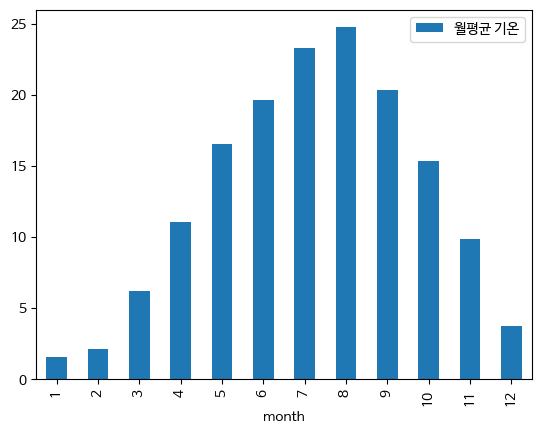

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') # 한글 글꼴 설정
path = 'https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/'
wdf = pd.read_csv(path+'weather.csv', encoding='UTF-8').set_index('일시')

# 새로운 'month' 열을 만든다
wdf['month'] = pd.DatetimeIndex(wdf.index).month
means = wdf.groupby('month').mean(numeric_only=True)
means['평균 기온'].plot(kind = 'bar', label='월평균 기온')
plt.legend()
plt.show()

### 8.7 조건에 맞게 골라내자 : max, idxmax

In [148]:
import pandas as pd   # 이하 이 코드는 표시하지 않음

path = 'https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/data/csv/'
wdf = pd.read_csv(path+'weather.csv', encoding='UTF-8').set_index('일시')
# 새로운 'year' 열을 만든다
wdf['year'] = pd.DatetimeIndex(wdf.index).year
y_max = wdf.groupby('year').max(numeric_only=True)
print(y_max)

      평균 기온  최대 풍속  평균 풍속
year                     
2010   28.9   16.9   10.3
2011   27.6   21.6   12.5
2012   28.3   17.5    9.2
2013   31.3   17.8   10.1
2014   27.5   16.1   11.2
2015   29.6   25.3   14.9
2016   28.5   18.0   13.3
2017   28.3   18.0   12.7
2018   30.5   26.0   12.0
2019   29.7   25.8   12.7
2020   25.7   22.2   11.6


In [149]:
y_max.max()

평균 기온    31.3
최대 풍속    26.0
평균 풍속    14.9
dtype: float64

In [151]:
y_max['평균 기온'].max()

np.float64(31.3)

In [152]:
print('최대 풍속의 최대값 :', y_max['최대 풍속'].max(), 'm/s')
print('평균 풍속의 최대값 :', y_max['평균 풍속'].max(), 'm/s')

최대 풍속의 최대값 : 26.0 m/s
평균 풍속의 최대값 : 14.9 m/s


In [153]:
y_max.idxmax()

평균 기온    2013
최대 풍속    2018
평균 풍속    2015
dtype: int32

In [154]:
df = pd.DataFrame({'year' : y_max.idxmax(), 'max': y_max.max()})
df

,year,max
평균 기온,2013,31.3
최대 풍속,2018,26.0
평균 풍속,2015,14.9


In [155]:
y_max.loc[y_max['평균 기온'].idxmax()]

평균 기온    31.3
최대 풍속    17.8
평균 풍속    10.1
Name: 2013, dtype: float64

### 8.8 조건에 맞게 골라내자 : 필터링

In [156]:
wdf['최대 풍속'] >= 10.0

일시
2010-08-01    False
2010-08-02    False
2010-08-03    False
2010-08-04    False
2010-08-05    False
              ...  
2020-07-27    False
2020-07-28    False
2020-07-29    False
2020-07-30    False
2020-07-31    False
Name: 최대 풍속, Length: 3653, dtype: bool

In [157]:
new_df = wdf[ wdf['최대 풍속'] >= 10.0 ]
print(new_df)

            평균 기온  최대 풍속  평균 풍속  year
일시                                   
2010-08-10   25.6   10.2    5.5  2010
2010-08-13   24.3   10.9    4.6  2010
2010-08-14   25.0   10.8    4.4  2010
2010-08-15   24.5   16.9   10.3  2010
2010-08-30   26.2   10.5    6.2  2010
...           ...    ...    ...   ...
2020-07-01   16.8   19.7    8.7  2020
2020-07-11   20.1   10.3    4.1  2020
2020-07-13   17.8   10.3    4.6  2020
2020-07-14   17.8   12.7    9.4  2020
2020-07-20   23.0   11.2    7.3  2020

[830 rows x 4 columns]


In [158]:
new_df.count()

평균 기온    830
최대 풍속    830
평균 풍속    827
year     830
dtype: int64

In [159]:
new_df = wdf[ wdf['평균 기온'] >= 30.0 ]
day = new_df['평균 기온'].count()
print('2010년 8월부터 2020년 7월까지 평균 기온이 30도를 넘었던 날은',day,'일')

2010년 8월부터 2020년 7월까지 평균 기온이 30도를 넘었던 날은 5 일


In [162]:
new_df = wdf.query(" `평균 기온` >= 30 ")
day = new_df['평균 기온'].count()
print('2010년 8월부터 2020년 7월까지 평균 기온이 30도를 넘었던 날은',day,'일')

2010년 8월부터 2020년 7월까지 평균 기온이 30도를 넘었던 날은 5 일


In [163]:
wdf = wdf.rename(columns={'평균 기온': '평균기온', '최대 풍속': '최대풍속',\
                          '평균 풍속':'평균풍속'})
wdf.head(2)

,평균기온,최대풍속,평균풍속,year
일시,,,,
2010-08-01,28.7,8.3,3.4,2010
2010-08-02,25.2,8.7,3.8,2010


In [164]:
# 평균과 기온 사이에 공백을 삭제하였으므로 역따옴표가 필요없음
new_df = wdf.query(" 평균기온 >= 30 ")
day = new_df['평균기온'].count()
print('2010년 8월부터 2020년 7월까지 평균 기온이 30도를 넘었던 날은',day,'일')

2010년 8월부터 2020년 7월까지 평균 기온이 30도를 넘었던 날은 5 일


#### 도전문제 8.6 : 평균 기온이 영하의 날씨였던 날은 며칠이었나(난이도 : 중)

In [165]:
new_df = wdf[ wdf['평균기온'] < 0.0 ]
day = new_df['평균기온'].count()
print('2010년 8월부터 2020년 7월까지 평균 기온이 영하의 날씨였던 날은',day,'일')

2010년 8월부터 2020년 7월까지 평균 기온이 영하의 날씨였던 날은 235 일


In [166]:
new_df = wdf.query('평균기온 < 0.0')
day = new_df['평균기온'].count()
print('2010년 8월부터 2020년 7월까지 평균 기온이 영하의 날씨였던 날은',day,'일')

2010년 8월부터 2020년 7월까지 평균 기온이 영하의 날씨였던 날은 235 일


### 8.9 빠진 값을 찾아서 처리하자 : 결측값

In [167]:
path = 'https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/data/csv/'
wdf = pd.read_csv(path+'weather.csv', encoding='UTF-8').set_index('일시')
wdf['평균 풍속'].isna()

일시
2010-08-01    False
2010-08-02    False
2010-08-03    False
2010-08-04    False
2010-08-05    False
              ...  
2020-07-27    False
2020-07-28    False
2020-07-29    False
2020-07-30    False
2020-07-31    False
Name: 평균 풍속, Length: 3653, dtype: bool

In [170]:
missing_data1 = wdf[ wdf['최대 풍속'].isna() ]
print(missing_data1)

            평균 기온  최대 풍속  평균 풍속
일시                             
2012-02-11   -0.7    NaN    NaN
2012-02-12    0.4    NaN    NaN
2012-02-13    4.0    NaN    NaN
2019-04-19    7.8    NaN    2.3


In [169]:
wdf.isna().sum() # True를 1로 간주하여 합계

평균 기온    0
최대 풍속    4
평균 풍속    6
dtype: int64

In [171]:
missing_data2 = wdf[ wdf['최대 풍속'].isna() ]
print(missing_data2)

            평균 기온  최대 풍속  평균 풍속
일시                             
2012-02-11   -0.7    NaN    NaN
2012-02-12    0.4    NaN    NaN
2012-02-13    4.0    NaN    NaN
2019-04-19    7.8    NaN    2.3


In [172]:
wdf.dropna(axis=0, how="any", inplace=True)

In [173]:
wdf.loc['2012-02-11']

KeyError: '2012-02-11'

### 8.10 결측값이 있는 행과 열을 제거하자

In [174]:
path = 'https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/data/csv/'
wdf = pd.read_csv(path+'weather.csv', encoding='UTF-8').set_index('일시')

missing_data1 = wdf [ wdf['평균 풍속'].isna() ]
print(missing_data1)

            평균 기온  최대 풍속  평균 풍속
일시                             
2012-02-11   -0.7    NaN    NaN
2012-02-12    0.4    NaN    NaN
2012-02-13    4.0    NaN    NaN
2015-03-22   10.1   11.6    NaN
2015-04-01    7.3   12.1    NaN
2019-04-18   15.7   11.7    NaN


In [175]:
df = missing_data1.dropna(axis=1, how='all')
print(df)

            평균 기온  최대 풍속
일시                      
2012-02-11   -0.7    NaN
2012-02-12    0.4    NaN
2012-02-13    4.0    NaN
2015-03-22   10.1   11.6
2015-04-01    7.3   12.1
2019-04-18   15.7   11.7


In [176]:
df = missing_data1.dropna(axis=1, how='any')
print(df)

            평균 기온
일시               
2012-02-11   -0.7
2012-02-12    0.4
2012-02-13    4.0
2015-03-22   10.1
2015-04-01    7.3
2019-04-18   15.7


### 8.11 결측값을 메우는 다양한 방법

In [184]:
path = 'https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/data/csv/'
wdf = pd.read_csv(path+'weather.csv', encoding='UTF-8').set_index('일시')
wdf.loc['2012-02-11']

평균 기온   -0.7
최대 풍속    NaN
평균 풍속    NaN
Name: 2012-02-11, dtype: float64

In [178]:
df = wdf.fillna(0)
df.loc['2012-02-11']

평균 기온   -0.7
최대 풍속    0.0
평균 풍속    0.0
Name: 2012-02-11, dtype: float64

In [185]:
wdf.loc['2012-02-10']

평균 기온   -0.8
최대 풍속    5.3
평균 풍속    0.7
Name: 2012-02-10, dtype: float64

In [186]:
wdf.loc['2012-02-11']

평균 기온   -0.7
최대 풍속    NaN
평균 풍속    NaN
Name: 2012-02-11, dtype: float64

In [188]:
# df = wdf.fillna(method='ffill') 
df = wdf.ffill() # 권장
print(df.loc['2012-02-10'])
print(df.loc['2012-02-11'])

평균 기온   -0.8
최대 풍속    5.3
평균 풍속    0.7
Name: 2012-02-10, dtype: float64
평균 기온   -0.7
최대 풍속    5.3
평균 풍속    0.7
Name: 2012-02-11, dtype: float64


In [191]:
#df = wdf.fillna(method='bfill')
df = wdf.bfill()
print(df.loc['2012-02-11'])
print(df.loc['2012-02-14'])

평균 기온   -0.7
최대 풍속    6.0
평균 풍속    2.4
Name: 2012-02-11, dtype: float64
평균 기온    4.8
최대 풍속    6.0
평균 풍속    2.4
Name: 2012-02-14, dtype: float64


In [192]:
wdf.mean()

평균 기온    12.942102
최대 풍속     7.911099
평균 풍속     3.936441
dtype: float64

In [193]:
df = wdf.fillna(wdf.mean())
print(df.loc['2012-02-11'])

평균 기온   -0.700000
최대 풍속    7.911099
평균 풍속    3.936441
Name: 2012-02-11, dtype: float64


#### 도전문제 8.7 : 결측값을 최대값으로 채워보자(난이도 : 중)
##### 2012년 2월 11일의 결측값을 데이터 집합의 최대값으로 채워보자.

In [194]:
wdf.max()

평균 기온    31.3
최대 풍속    26.0
평균 풍속    14.9
dtype: float64

In [195]:
df = wdf.fillna(wdf.max())
print(df.loc['2012-02-11'])

평균 기온    -0.7
최대 풍속    26.0
평균 풍속    14.9
Name: 2012-02-11, dtype: float64


### 8.12 inplace로 데이터프레임을 갱신하자

In [196]:
import pandas as pd

path = 'https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/'
wdf = pd.read_csv(path+'weather.csv', encoding='UTF-8').set_index('일시')
wdf.loc['2012-02-11']  # 2012년 2월 11일 데이터를 살펴보자

평균 기온   -0.7
최대 풍속    NaN
평균 풍속    NaN
Name: 2012-02-11, dtype: float64

In [199]:
wdf.fillna(0)
wdf.loc['2012-02-11']

평균 기온   -0.7
최대 풍속    NaN
평균 풍속    NaN
Name: 2012-02-11, dtype: float64

In [200]:
wdf.fillna(0, inplace=True)
wdf.loc['2012-02-11']

평균 기온   -0.7
최대 풍속    0.0
평균 풍속    0.0
Name: 2012-02-11, dtype: float64

In [ ]:
import pandas as pd

path = 'https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/'
wdf = pd.read_csv(path+'weather.csv', encoding='UTF-8').set_index('일시')

wdf.fillna( wdf['평균 풍속'].mean(), inplace = True)
print(wdf.loc['2012-02-11'])   # 2012년 2월 11일 데이터가 삭제되지 않음

### 8.13 결측값과 이상치를 처리하자

### 8.14 이상치를 찾아보자

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)
rnd = np.random.randn(1000, 1)
df = pd.DataFrame(rnd)
# 상자 플롯으로 랜덤 데이터를 시각화하자.
plt.boxplot( rnd )
plt.show()

In [ ]:
df

In [ ]:
def find_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[((df<=(Q1-1.5*IQR)) | (df>=(Q3+1.5*IQR)))]
    return outliers

outliers = find_outliers_IQR(df[0])
print('df의 이상치 수: '+ str(len(outliers)))
print('df의 최대 이상치: '+ str(outliers.max()))
print('df의 최소 이상치: '+ str(outliers.min()))

In [ ]:
# 이상치 데이터를 삭제하고 데이터프레임의 인덱스를 다시 메기자
df.drop(outliers.index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True) # 인덱스 초기화, drop=True 기존 인덱스는 버리고 새 인덱스만 유지
print('df.shape =', df.shape)

In [ ]:
outliers = find_outliers_IQR(df[0])
print('df의 이상치 수: '+ str(len(outliers)))

In [ ]:
# 이상치를 제거한 데이터프레임을 상자 플롯으로 그려보자
plt.boxplot(df)
plt.show()